                        Value
Date                         
2024-09-01 00:00:00  59038.12
2024-09-01 00:15:00  58961.41
2024-09-01 00:30:00  58908.99
2024-09-01 00:45:00  58930.00
2024-09-01 01:00:00  58876.48
...                       ...
2024-12-09 23:30:00  97430.01
2024-12-09 23:45:00  97276.47
2024-12-10 00:00:00  97297.17
2024-12-10 00:15:00  97573.03
2024-12-10 00:30:00  97707.69

[9603 rows x 1 columns]


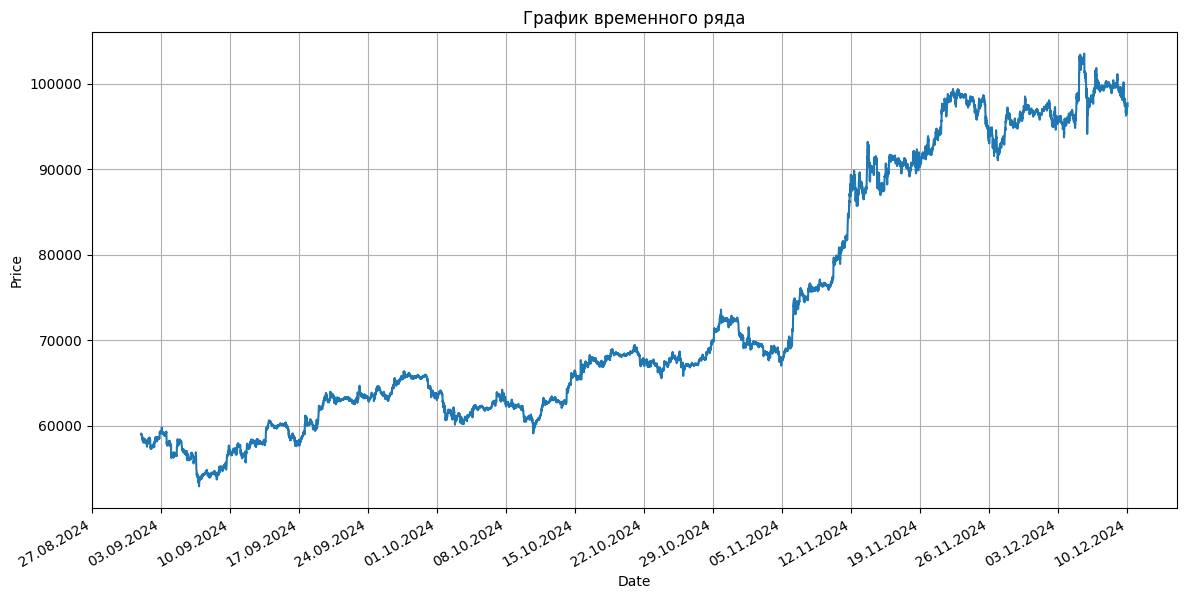

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Загрузка и подготовка данных
data = pd.read_csv('BTC15m.csv', delimiter=',', parse_dates=True)
data = data.rename(columns={'Close': 'Value'})
data = data.rename(columns={'Open time': 'Date'})
data = data.drop(['Open', 'Low', 'High', 'Volume',
                  'Close time', 'Quote asset volume', 'Number of trades',
                  'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'], axis=1)
# 15m
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S')

#1d
# data['Date'] = data['Date'].str.split(' ').str[0]
# data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

data.set_index('Date', inplace=True)

# Фильтруем данные для периода
data_filtered = data[(data.index >= '2024-09-01') & (data.index < '2025-01-01')]
print(data_filtered)

# График временного ряда
plt.figure(figsize=(14, 7))
plt.plot(data_filtered.index, data_filtered["Value"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("График временного ряда")

# Настройка отображения дат на оси X с интервалом в 7 дней
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Каждую неделю
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))  # Формат даты: dd.mm.yyyy

# Ограничение количества меток на оси X для лучшей читаемости
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Каждую неделю
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))

# Поворот меток для лучшей читаемости
plt.gcf().autofmt_xdate()

# График с сеткой
plt.grid(True)
plt.show()


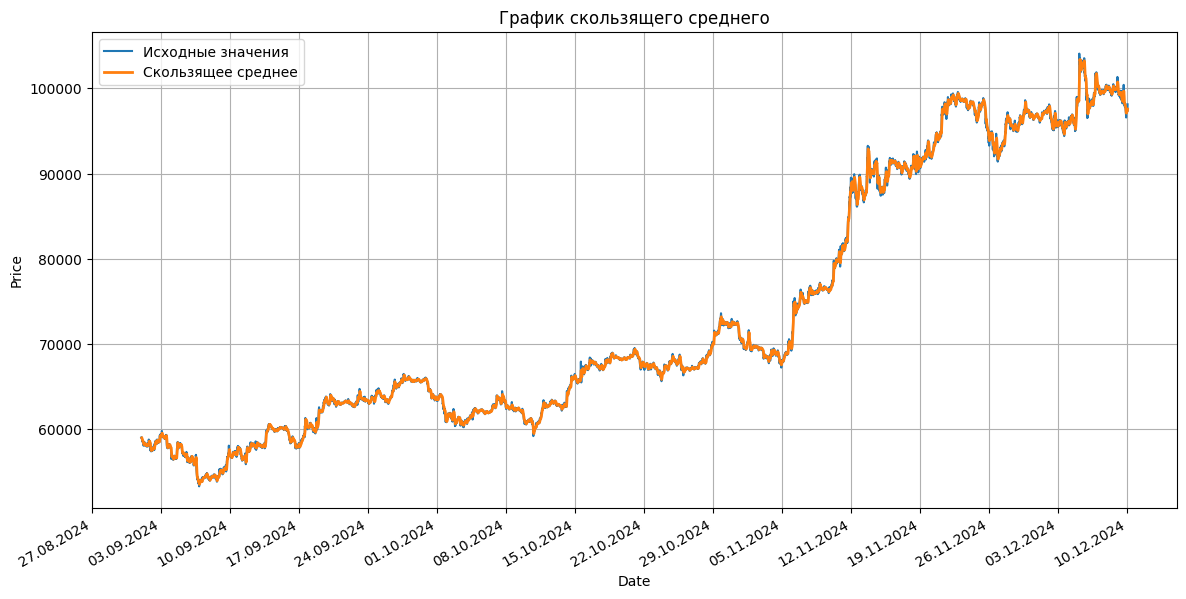

In [131]:
# Рассчитываем скользящее среднее (с окном в 7 day)
rolling_mean = data_filtered["Value"].rolling(window=7).mean()

# График временного ряда с скользящим средним
plt.figure(figsize=(14, 7))
plt.plot(data_filtered.index, data_filtered["Value"], label="Исходные значения")
plt.plot(data_filtered.index, rolling_mean, label="Скользящее среднее", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("График скользящего среднего")

# Настройка отображения дат на оси X с интервалом в 7 дней
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Каждую неделю
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))  # Формат даты: dd.mm.yyyy

# Ограничение количества меток на оси X для лучшей читаемости
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Каждую неделю
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))

# Поворот меток для лучшей читаемости
plt.gcf().autofmt_xdate()

# Добавляем легенду и сетку
plt.legend()
plt.grid(True)
plt.show()

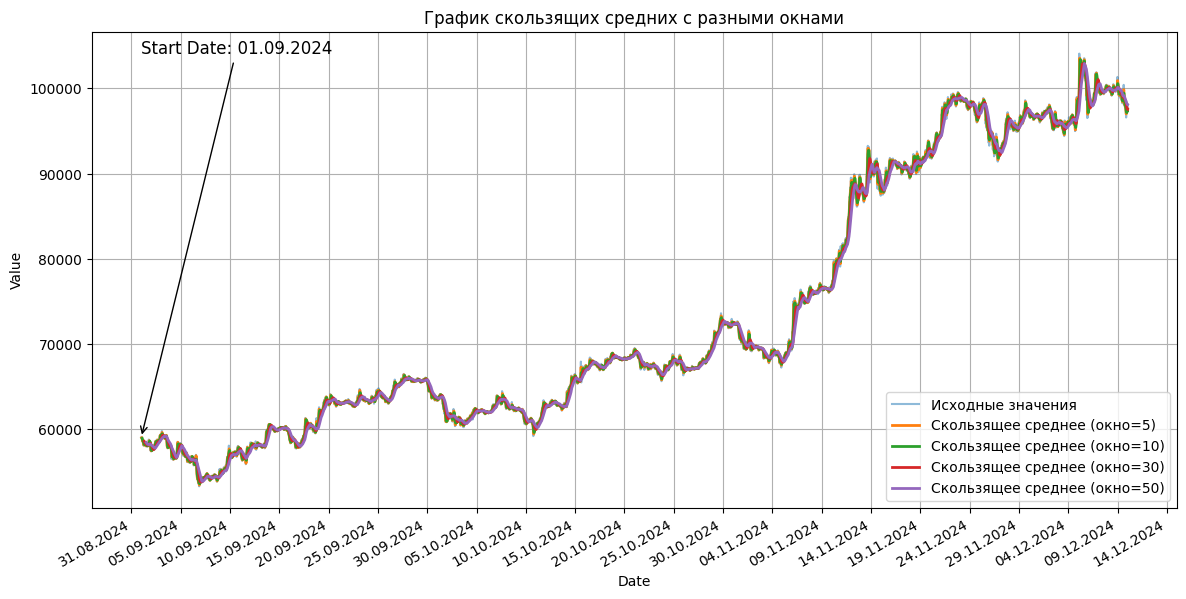

In [132]:
# Для расчета скользящих средних
rolling_mean_5 = data_filtered["Value"].rolling(window=5).mean()
rolling_mean_10 = data_filtered["Value"].rolling(window=10).mean()
rolling_mean_30 = data_filtered["Value"].rolling(window=30).mean()
rolling_mean_50 = data_filtered["Value"].rolling(window=50).mean()

# Построение графика
plt.figure(figsize=(14, 7))
plt.plot(data_filtered.index, data_filtered["Value"], label="Исходные значения", alpha=0.5)
plt.plot(data_filtered.index, rolling_mean_5, label="Скользящее среднее (окно=5)", linewidth=2)
plt.plot(data_filtered.index, rolling_mean_10, label="Скользящее среднее (окно=10)", linewidth=2)
plt.plot(data_filtered.index, rolling_mean_30, label="Скользящее среднее (окно=30)", linewidth=2)
plt.plot(data_filtered.index, rolling_mean_50, label="Скользящее среднее (окно=50)", linewidth=2)

# Настройки графика
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("График скользящих средних с разными окнами")

# Добавление аннотации для минимальной даты
min_date = data_filtered.index.min()  # Минимальная дата
plt.annotate(f"Start Date: {min_date.strftime('%d.%m.%Y')}",
             xy=(min_date, data_filtered["Value"].iloc[0]),
             xytext=(min_date, data_filtered["Value"].max()),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=12)

# Отключаем отображение дат на оси X, но оставляем метки
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Показываем метки раз в 5 дней
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))  # Формат даты: дд.мм.гггг
plt.gcf().autofmt_xdate()  # Поворот меток даты для лучшей читаемости

# Включаем сетку
plt.grid(True)

# Легенда в правом нижнем углу
plt.legend(loc='lower right')

# Показываем график
plt.show()

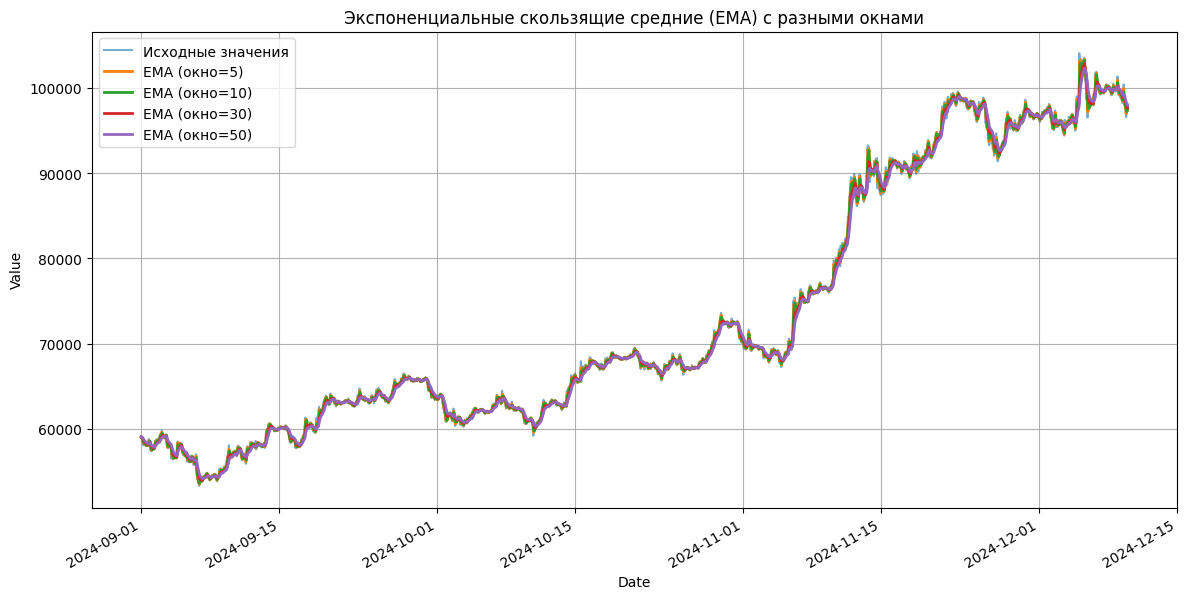

In [133]:
# Расчет экспоненциальных скользящих средних
ema_5 = data_filtered["Value"].ewm(span=5, adjust=False).mean()
ema_10 = data_filtered["Value"].ewm(span=10, adjust=False).mean()
ema_30 = data_filtered["Value"].ewm(span=30, adjust=False).mean()
ema_50 = data_filtered["Value"].ewm(span=50, adjust=False).mean()

# Построение графика
plt.figure(figsize=(14, 7))
plt.plot(data_filtered.index, data_filtered["Value"], label="Исходные значения", alpha=0.6)
plt.plot(data_filtered.index, ema_5, label="EMA (окно=5)", linewidth=2)
plt.plot(data_filtered.index, ema_10, label="EMA (окно=10)", linewidth=2)
plt.plot(data_filtered.index, ema_30, label="EMA (окно=30)", linewidth=2)
plt.plot(data_filtered.index, ema_50, label="EMA (окно=50)", linewidth=2)

# Настройка оформления графика
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Экспоненциальные скользящие средние (EMA) с разными окнами")
plt.legend()
plt.grid(True)

# Форматирование даты на оси X для лучшей читаемости
plt.gcf().autofmt_xdate()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


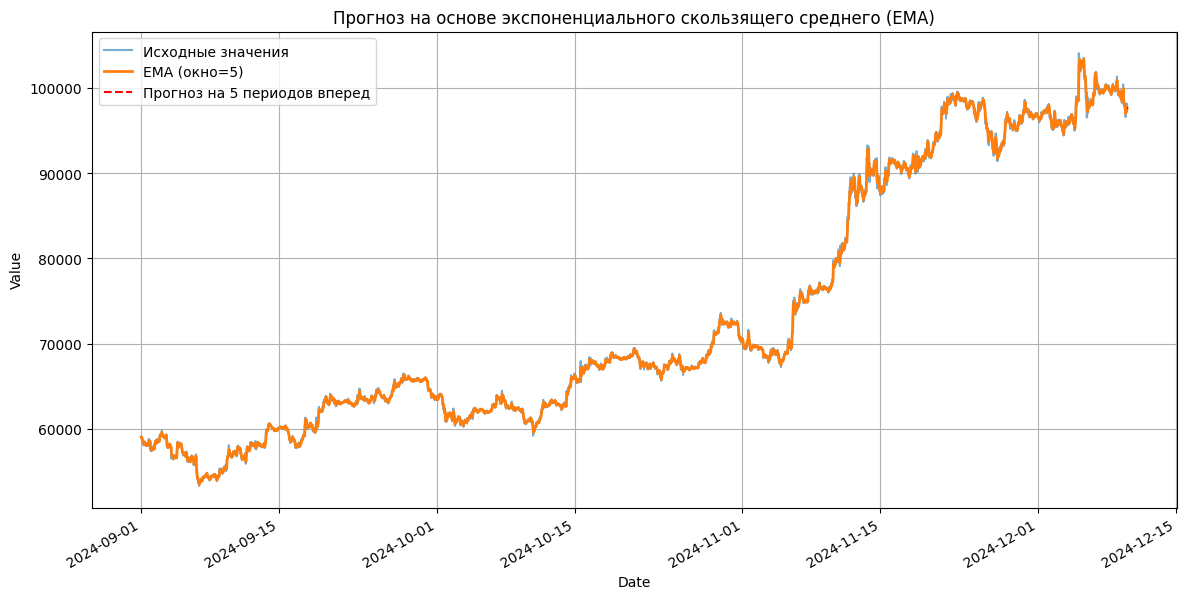

Прогноз на 5 периодов вперед:
2024-12-10 00:45:00    97687.787495
2024-12-10 01:00:00    97687.787495
2024-12-10 01:15:00    97687.787495
2024-12-10 01:30:00    97687.787495
2024-12-10 01:45:00    97687.787495
Freq: 15min, dtype: float64


In [137]:
#%matplotlib qt
%matplotlib inline
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Преобразование индекса в datetime (если это еще не сделано)
data_filtered.index = pd.to_datetime(data_filtered.index)

# Устанавливаем частоту временного ряда (каждые 15 минут)
data_filtered = data_filtered.asfreq('15min')

# Заполняем пропущенные значения, если они есть
data_filtered['Value'] = data_filtered['Value'].interpolate(method='time')  # Присваиваем результат в новый столбец

# Расчет экспоненциального скользящего среднего (EMA) с окном 5
data_filtered['EMA_5'] = data_filtered['Value'].ewm(span=5, adjust=False).mean()

# Построение модели экспоненциального сглаживания на основе EMA
model = ExponentialSmoothing(data_filtered['EMA_5'], trend=None, seasonal=None, seasonal_periods=None)
fit = model.fit()

# Прогноз на 5 периодов вперед
forecast = fit.forecast(steps=5)

# Построение графика исходных данных, EMA и прогноза
plt.figure(figsize=(14, 7))
plt.plot(data_filtered.index, data_filtered['Value'], label='Исходные значения', alpha=0.6)
plt.plot(data_filtered.index, data_filtered['EMA_5'], label='EMA (окно=5)', linewidth=2)
plt.plot(forecast.index, forecast, label='Прогноз на 5 периодов вперед', linestyle='--', color='red')

# Настройка графика
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Прогноз на основе экспоненциального скользящего среднего (EMA)")
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

# Вывод прогноза
print("Прогноз на 5 периодов вперед:")
print(forecast)